In [101]:
"""
Tests para evaluar uniformidad e independencia de los generadores de números aleatorios

Pueden ser:
• Teóricos: los que trabajan con la expresión del generado, para evaluar a los generados si los
números que generaría son uniformes e independientes
• Empíricos: aquellos que trabajan con los números obtenidos del generador para verificar
esas propiedades.
"""

from random import random
import statistics
import scipy
import scipy.stats as ss
from scipy.stats import chisquare
import matplotlib.pyplot as plt

#Para conectar con API de random.org
import requests
import json

import math
from scipy.stats import norm 

In [115]:
######## PUNTO 1 ########

#Vamos a generar 10000 números aleatorios
n = 10000
def aleatorio():
    return random()

lista_num = []
for i in range(n):
    lista_num.append(aleatorio())

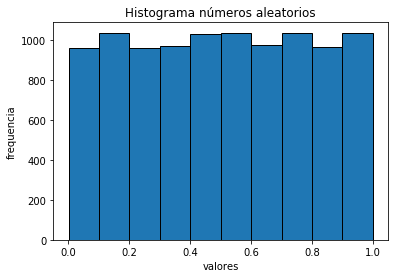

Frecuencia absoluta intervalos: [ 958. 1034.  960.  972. 1028. 1036.  976. 1035.  965. 1036.]
Cantidad intervalos:  10


In [116]:
#Vamos a probar el Test empírico de Chi-cuadrado

frec_absoluta,x,c = plt.hist(lista_num, edgecolor = 'black')
plt.ylabel('frequencia')
plt.xlabel('valores')
plt.title('Histograma números aleatorios')
plt.show()

print('Frecuencia absoluta intervalos:',frec_absoluta)
k = len(frec_absoluta)
print('Cantidad intervalos: ',k)

In [4]:
#Frecuencias esperadas
frec_esp = []
for i in range(k):
    frec_esp.append(n/k)
    
#Calculamos la variable de chi cuadrado
print('Valor chi cuadrado de la muestra:',chisquare(frec_absoluta, f_exp = frec_esp))

Valor chi cuadrado de la muestra: Power_divergenceResult(statistic=4.446, pvalue=0.8796876680760133)


In [5]:
######## PUNTO 2 ########

#Vamos a generar 10000 con GCL
Z0 = 7
m = 2**35
a = 5**15
c = 3

def generador_congruencial(zi_menos1, m, a, c):
    zi = (a*zi_menos1+c) % m
    return zi

zi_menos1 = Z0
lista_gcl = []
for i in range(1,n+1):
    Zi = generador_congruencial(zi_menos1,m,a,c)
    zi_menos1 = Zi
    Ui = Zi/m
    lista_gcl.append(Ui)

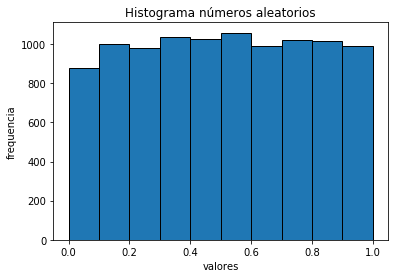

Frecuencia absoluta intervalos: [ 880. 1001.  978. 1037. 1027. 1058.  992. 1019. 1018.  990.]
Cantidad intervalos:  10


In [6]:
#Vamos a probar el Test empírico de Chi-cuadrado

frec_absoluta_gcl,x,c = plt.hist(lista_gcl, edgecolor = 'black')
plt.ylabel('frequencia')
plt.xlabel('valores')
plt.title('Histograma números aleatorios')
plt.show()

print('Frecuencia absoluta intervalos:',frec_absoluta_gcl)
k = len(frec_absoluta_gcl)
print('Cantidad intervalos: ',k)

In [7]:
#Frecuencias esperadas
frec_esp_gcl = []
for i in range(k):
    frec_esp_gcl.append(n/k)
    
#Calculamos la variable de chi cuadrado
print('Valor chi cuadrado de la muestra:',chisquare(frec_absoluta_gcl, f_exp = frec_esp_gcl))

Valor chi cuadrado de la muestra: Power_divergenceResult(statistic=21.196000000000005, pvalue=0.011808016253107335)


In [41]:
######## PUNTO 3 ########

#Vamos a conectarnos con un get a la api de random.org para generar los valores
url = 'https://www.random.org/decimal-fractions/?num=10000&dec=10&col=1&format=plain&rnd=new'

response = requests.get(url).text

print(response)

0.5749302747
0.8762749423
0.8624969541
0.4776741725
0.2621865982
0.4827560260
0.6268883778
0.0978024851
0.0729080338
0.9396183185
0.2573885194
0.7178067134
0.9090251847
0.1817796335
0.9167832866
0.2899040017
0.8089976677
0.6674099335
0.1601256708
0.2050529841
0.0696883491
0.6436517365
0.6096068047
0.0354714106
0.5469367971
0.1566357309
0.5381514468
0.6821739862
0.2136038006
0.0415868757
0.6849898459
0.9534854503
0.5335711749
0.4017418074
0.7810529697
0.8038879822
0.1441054516
0.0415436327
0.8719084571
0.0055618903
0.4680220255
0.9845163627
0.8825545915
0.6408077628
0.2465197040
0.0988981745
0.5656066435
0.0083724882
0.7981610226
0.6729167945
0.6458838874
0.8851203453
0.0613157947
0.2143352738
0.8178339125
0.8581120625
0.9409478018
0.7837280442
0.4485361365
0.2000957379
0.3441741012
0.4724561163
0.5339631517
0.9384201589
0.2626856685
0.8472695116
0.6418575374
0.2482293714
0.7061887059
0.2941868807
0.1118395746
0.6100766900
0.4521265520
0.6989590850
0.3991197484
0.5368632375
0.6050591510

In [56]:
lista_random_org = []
for i in response.split("\n"):
    try:
        lista_random_org.append(float(i))
    except:
        pass
#print(lista_random_org,len(lista_random_org))

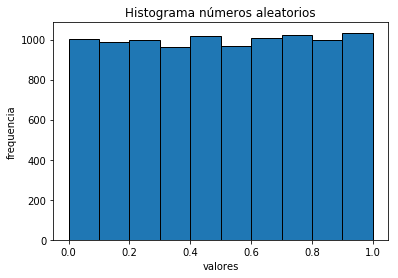

Frecuencia absoluta intervalos: [1001.  990.  999.  963. 1018.  966. 1010. 1021.  998. 1034.]
Cantidad intervalos:  10


In [57]:
#Vamos a probar el Test empírico de Chi-cuadrado

frec_absoluta_random_org,x,c = plt.hist(lista_random_org, edgecolor = 'black')
plt.ylabel('frequencia')
plt.xlabel('valores')
plt.title('Histograma números aleatorios')
plt.show()

print('Frecuencia absoluta intervalos:',frec_absoluta_random_org)
k = len(frec_absoluta_random_org)
print('Cantidad intervalos: ',k)

In [58]:
#Frecuencias esperadas
frec_esp_random_org = []
for i in range(k):
    frec_esp_random_org.append(n/k)
    
#Calculamos la variable de chi cuadrado
print('Valor chi cuadrado de la muestra:',chisquare(frec_absoluta_random_org, f_exp = frec_esp_random_org))

Valor chi cuadrado de la muestra: Power_divergenceResult(statistic=4.652, pvalue=0.863528580612023)


In [124]:
######## PUNTO 4 ########

#Vamos a identificar subsecuencias crecientes y contínuas
subsecuencias_menor_5 = 0
subsecuencias_mayor_6 = 0

for i in range(n-1):
    cant = 0
    if lista_num[i] < lista_num[i+1]:
        j = i
        while lista_num[j] < lista_num[j+1] and j < n-2:
            cant += 1
            j+=1
        if cant <= 5:
            subsecuencias_menor_5 += 1
        else:
            subsecuencias_mayor_6 +=1
        i = j
print('Cantidas de subsecuencias crecientes de longitud <= 5:',subsecuencias_menor_5)
print('Cantidas de subsecuencias crecientes de longitud >= 6:',subsecuencias_mayor_6)
total_corridas = subsecuencias_menor_5 + subsecuencias_mayor_6
print('Total de subsecuencias corridas:',total_corridas)

Cantidas de subsecuencias crecientes de longitud <= 5: 4973
Cantidas de subsecuencias crecientes de longitud >= 6: 0
Total de subsecuencias corridas: 4973


In [123]:
#Calculamos media y varianza del total de corridas
mu = (2*n-1)/3
print('Esperanza:',mu)
sigma2 = (16*n-29)/90
print('Varianza:',sigma2)
sigma = math.sqrt(sigma2)
print('Desvío:',sigma,'\n')

#tomamos alfa
alfa = 0.05

alfa2 = 1-alfa/2

#Si total_corridas se encuentra en el rango de aceptaciónn (intervalo de confianza),
#no se puede rechazar la hipótesis que los datos son independientes. 
#Se tiene un indicio para independencia, pero sólo en el aspecto de la corridas.
#En el otro caso, se tiene evidencia que hay dependencia en los datos
#(y se puede rechazar el generador).

[Inf,Sup] = [-alfa2*sigma+mu,alfa2*sigma+mu]
print('Rango aceptación:',[Infcrit,Supcrit])
print('Total de subsecuencias:',total_corridas)
if total_corridas >= Inf and total_corridas <= Sup:
    print('No se puede rechazar la hipótesis de que los datos son independientes')
else:
    print('Se tiene evidencia de que los datos son dependientes, se rechaza el generador')

Esperanza: 6666.333333333333
Varianza: 1777.4555555555555
Desvío: 42.159880876913725 

Rango aceptación: [6625.227449478342, 6707.439217188324]
Total de subsecuencias: 4973
Se tiene evidencia de que los datos son dependientes, se rechaza el generador
